# Project: The Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

I am going to explore average vote, budget, popularity, and revenue variables individually. Then, I will explore how budget and popularity affect revenue.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(10866, 21)

In [5]:
# this returns the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

All columns are in correct data types except for release_date, which should be datetime instead of string.

In [6]:
# this displays a concise summary of the dataframe, including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There are missing values in the data set. However, since all of them are non-numerical values, I will leave them be.

In [7]:
# this returns the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
# this returns useful descriptive statistics for each column of data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In budget, revenue, runtime budget_adj, revenue_adj columns, the min values are 0, which does not make sense. I will replace them with the mean values. 

In [9]:
# check for duplicates in the data
sum(df.duplicated())

1

There is 1 duplicated row in the data set.

### Data Cleaning

#### Drop duplicates

In [10]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

#### Convert to correct datatypes

In [12]:
# convert datatype of release_time from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
# confirm change by rechecking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

#### Drop unused columns

In [14]:
# drop unused columns
df.drop(['original_title','cast','homepage','director','tagline','keywords','overview','genres','production_companies'], axis=1, inplace=True)

In [15]:
# confirm change with df.head()
df.head()

,id,imdb_id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Replace zero value

In [16]:
#replace zero values with mean values
df=df.mask(df==0).fillna(df.mean())

In [17]:
# confirm change with df.describe()
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,2.229110e+07,6.187923e+07,102.363021,217.399632,5.975012,2001.321859,2.675046e+07,7.981225e+07
std,92134.091971,1.000231,2.801385e+07,1.110236e+08,30.904043,575.644627,0.935138,12.813260,3.051007e+07,1.365647e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,1.462429e+07,3.982690e+07,90.000000,17.000000,5.400000,1995.000000,1.754989e+07,5.136900e+07
50%,20662.000000,0.383831,1.462429e+07,3.982690e+07,99.000000,38.000000,6.000000,2006.000000,1.754989e+07,5.136900e+07
75%,75612.000000,0.713857,1.500000e+07,3.982690e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,5.136900e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Do movies with higher budget generate more revenue?

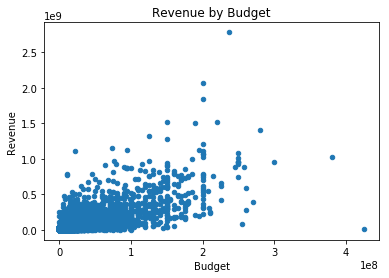

In [25]:
# plot relationship between popularity and revenue
df.plot(x='budget',y='revenue', kind='scatter')
plt.title('Revenue by Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue');

From the plot, we can see that there is a positive correlation between budget and revenue

In [20]:
# get the median amount of budget
budget_median = df.budget.median()
print(budget_median)

14624286.0643


In [21]:
# select samples with budget less than the median
low_budget = df.query('budget < {}'.format(budget_median))

# select samples with budget greater than or equal to the median
high_budget = df.query('budget >= {}'.format(budget_median))

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_budget['revenue'].count() + high_budget['revenue'].count()

True

In [22]:
# get mean quality rating for the low budget and high budget groups
low_budget.revenue.mean(), high_budget.revenue.mean()

(35154617.620552965, 68972799.803878754)

### Do movies with higher popularity score generate more revenue?

In [23]:
# Use query to select each group and get its median popularity score
popularity_median = df['popularity'].median()
less_popular = df.query('popularity < {}'.format(popularity_median))
more_popular = df.query('popularity >= {}'.format(popularity_median))

mean_less_popular = less_popular['revenue'].mean()
mean_more_popular = more_popular['revenue'].mean()

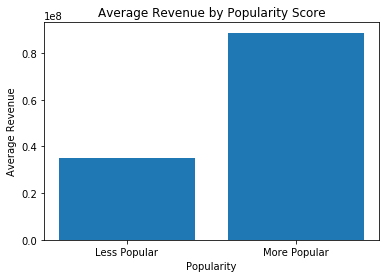

In [24]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_less_popular, mean_more_popular]
labels = ['Less Popular', 'More Popular']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Revenue by Popularity Score')
plt.xlabel('Popularity')
plt.ylabel('Average Revenue');

From the plot, we can see that more popular movie group has a higher average revenue.

### Do distributions of average vote, budget, popularity, and revenue appear to be normal?

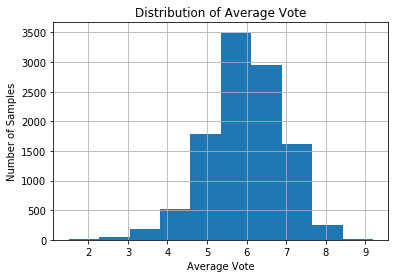

In [33]:
# plot distribution of average vote
df['vote_average'].hist()
plt.xlabel('Average Vote')
plt.title('Distribution of Average Vote')
plt.ylabel('Number of Samples');

From the plot, we can see that the distribution of average vote is skewed to the left.

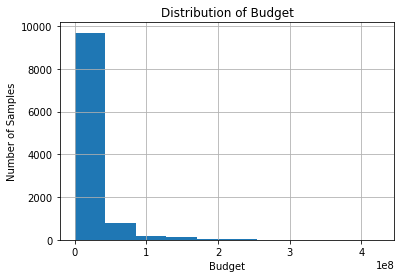

In [34]:
# plot distribution of budget
df['budget'].hist()
plt.xlabel('Budget')
plt.title('Distribution of Budget')
plt.ylabel('Number of Samples');

From the plot, we can see that the distribution of budget is skewed to the right.

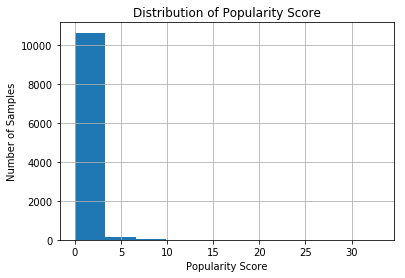

In [35]:
# plot distribution of popularity
df['popularity'].hist()
plt.xlabel('Popularity Score')
plt.title('Distribution of Popularity Score')
plt.ylabel('Number of Samples');

From the plot, we can see that the distribution of popularity is skewed to the right.

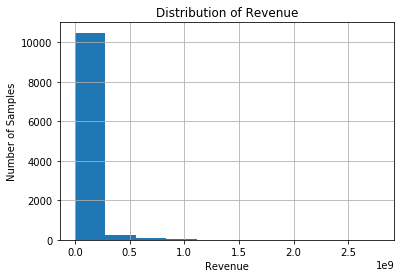

In [36]:
# plot distribution of revenue
df['revenue'].hist()
plt.xlabel('Revenue')
plt.title('Distribution of Revenue')
plt.ylabel('Number of Samples');

From the plot, we can see that the distribution of revenue is skewed to the right.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

### Findings

Finding 1: Movies with higher budget tends to generate more revenue.

Finding 2: More popular movies tends to generate more revenue.

Finding 3: Distribution of average vote is skewed to the left. Distributions of budget, popularity, and revenue are skewed to the right.

### Limitations

The data is incomplete. There are a lot of zero values in the columns of budget and revenue, which may potentially affect the quality of the data analysis.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0